# DSMCER Notebook 6 - Linear Modeling, Bias, and Variance

1. Single Linear Regression
    1. Residual Sum of Squares
    2. _Exercise_: fit a linear regressor
    3. _Poll_: are we there yet?
2. Classification from continuous output
3. Error/Accuracy Zoo

In [10]:
import pandas as pd
import numpy as np
import scipy.stats
import sklearn.linear_model

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')

***
***

## 1. Single Linear Regression

<font size=5><center>Recall in SML, our goal is to __make an estimate of $f(X)$ so that we can predict $y$__ without having to measure it!

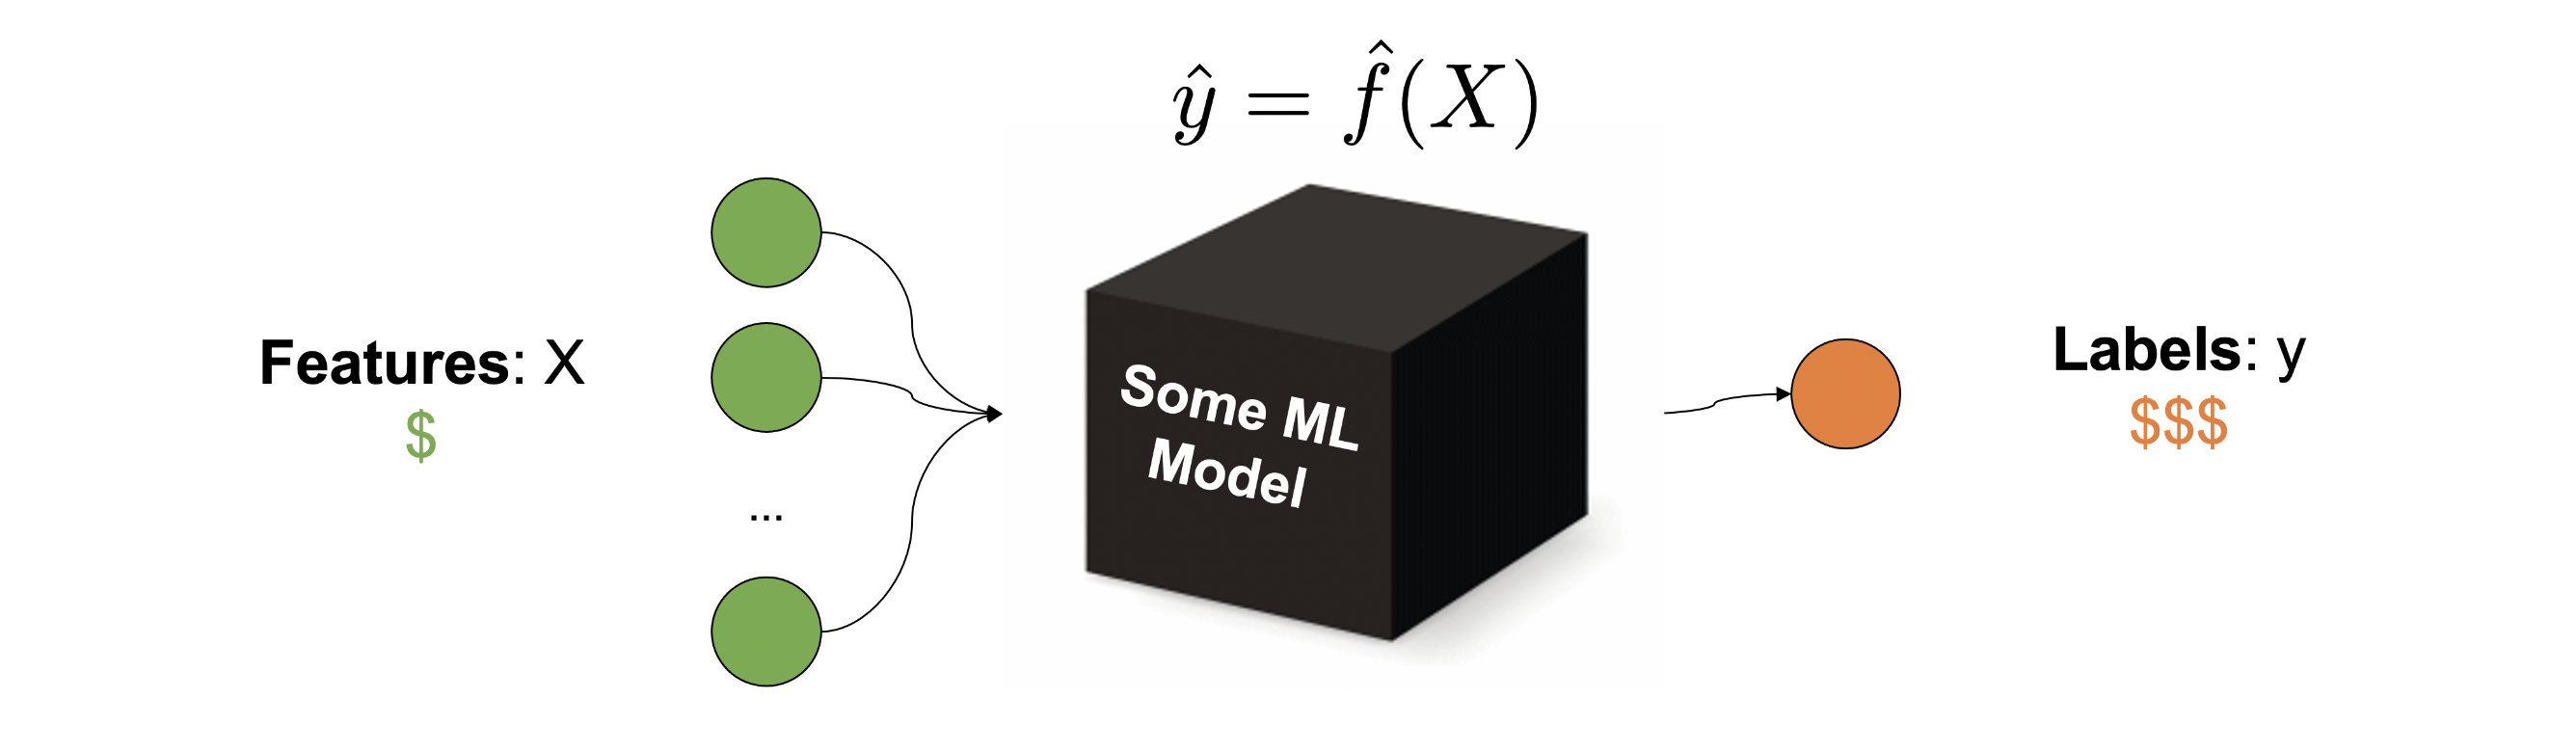

***
<font size=5><center>We can compute metrics about the model performance on any dataset with labels, but __the metrics we can use depend on the target data type__:

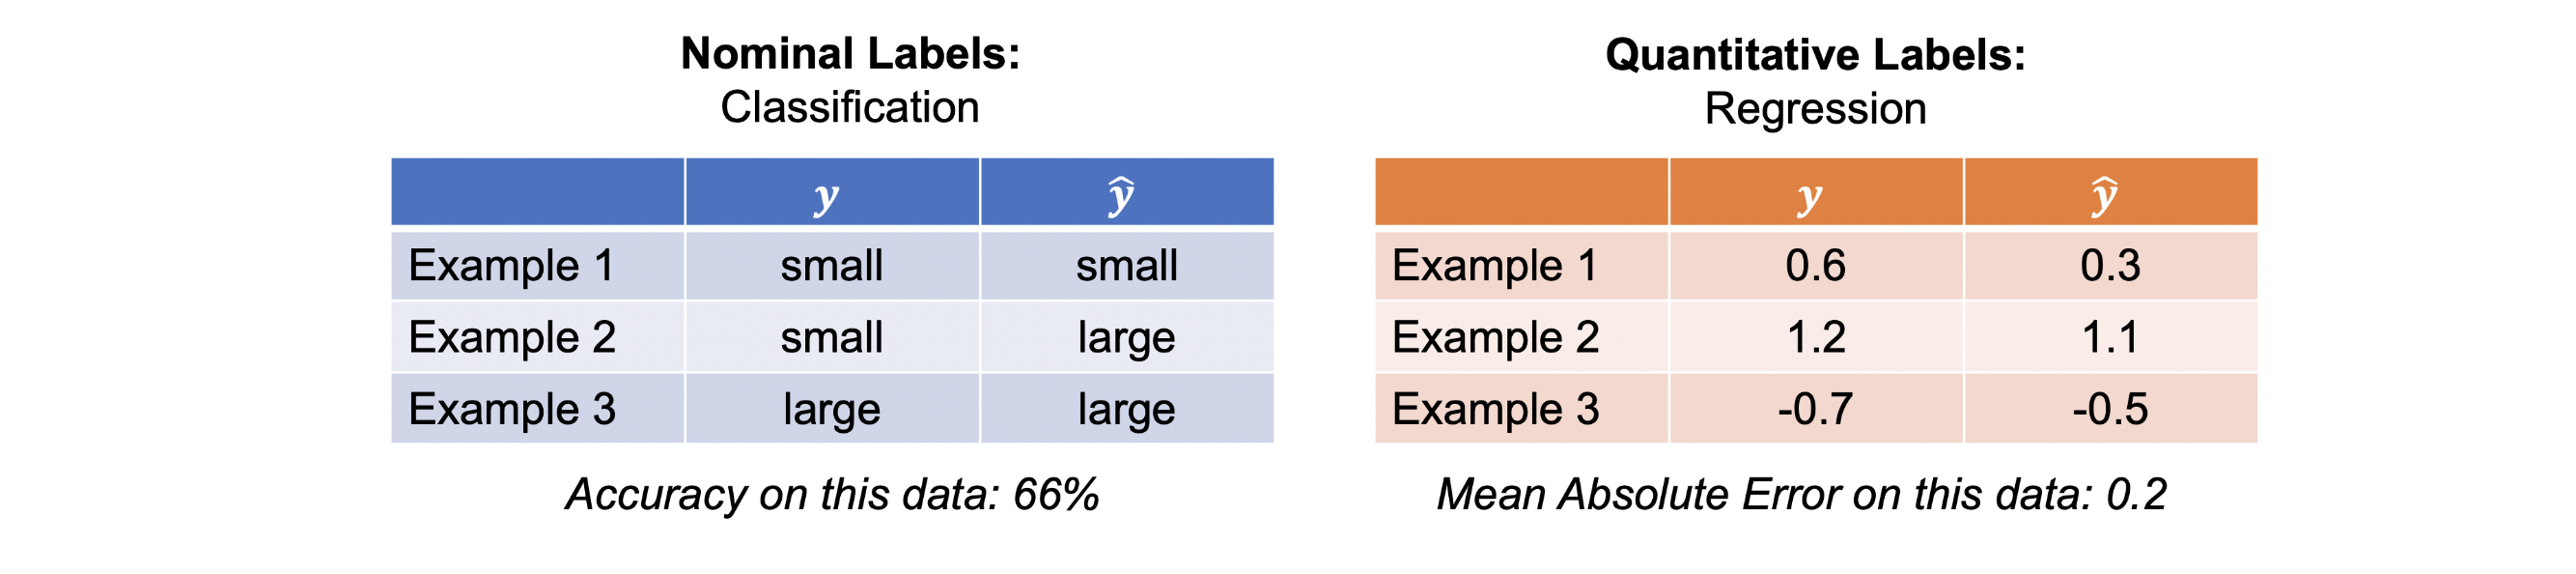

<font size=5><center>__If our target is continuous, it is a regression task, where as if they are nominal, it is a classification task__.

***

<font size=5><center>Recall that we seek to estimate $f$ to minimize "error":

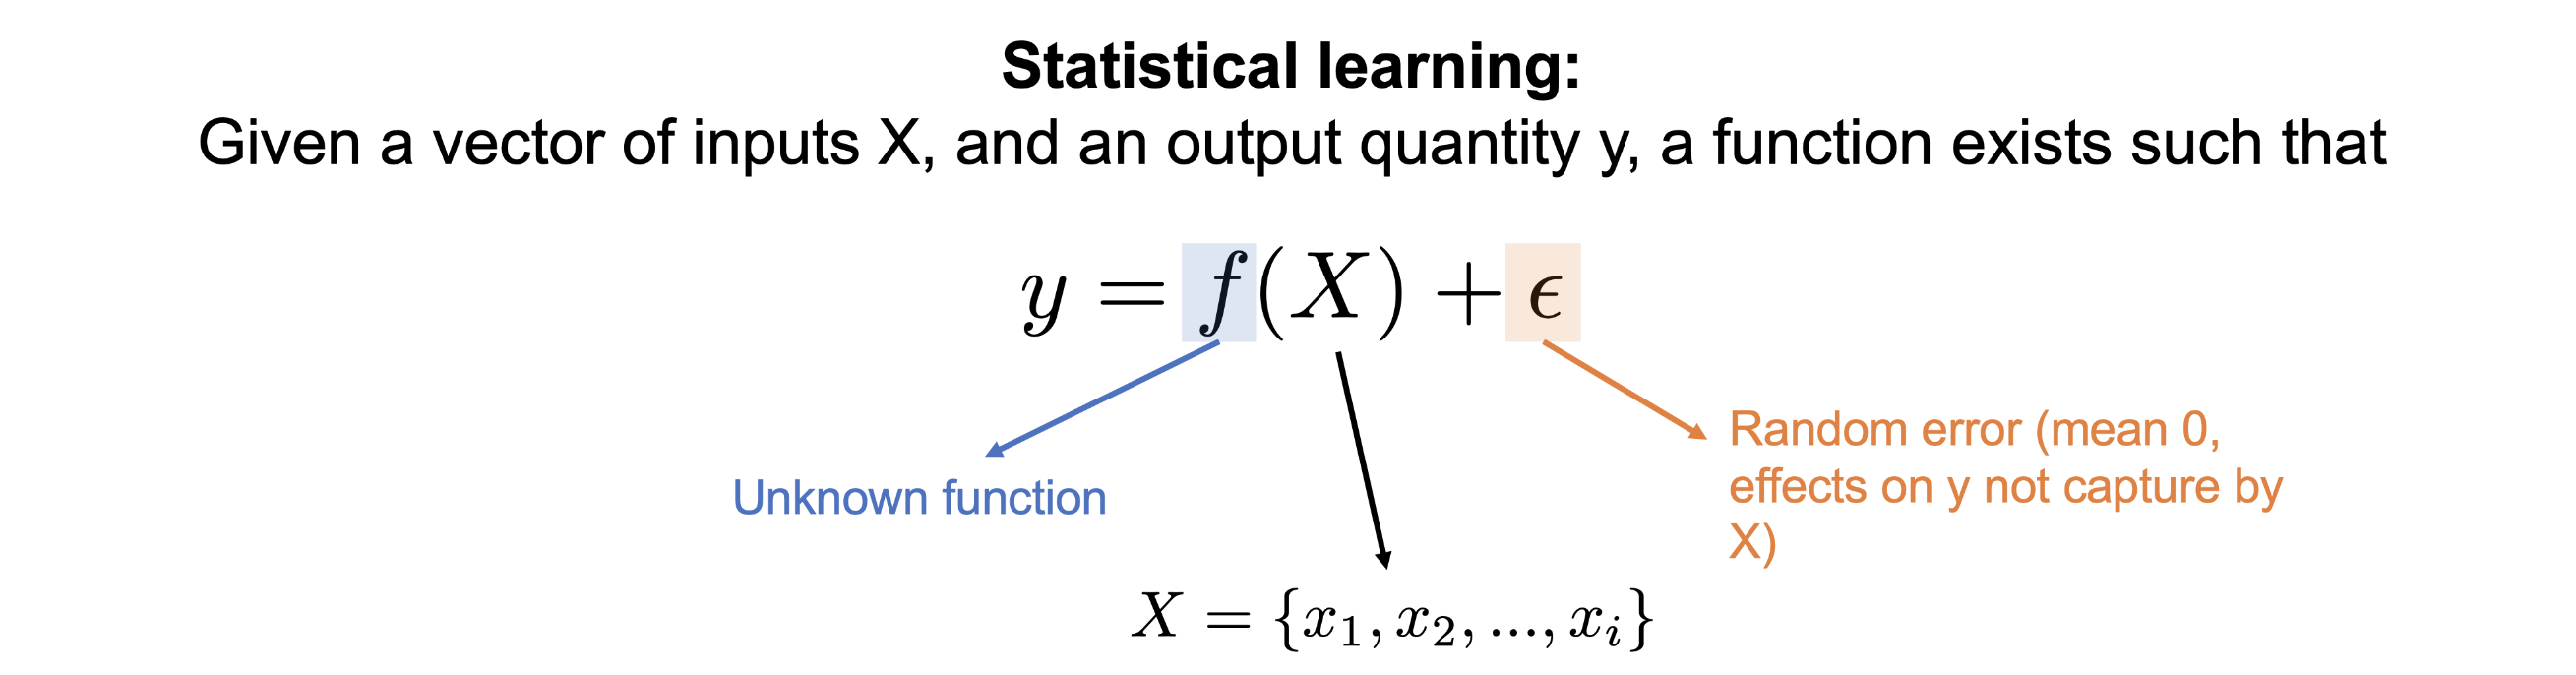

<font size=5><center>The sqaured error of the estimator $\hat{f}$ can be decomposed into two parts:

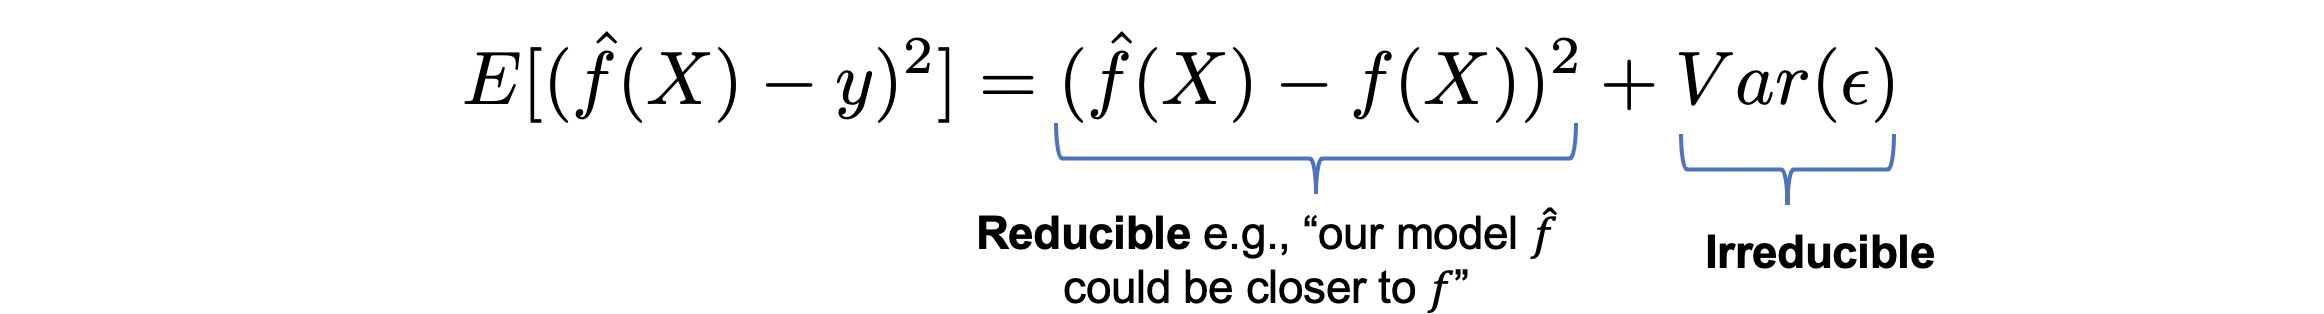

<font size=4>We do not have access to the left term __because we do not have the population, we only have a dataset (sample)__. Thus when we compute squared error for many examples in a dataset, __we are taking many observations of the left hand side__. 

<font size=5><center>The model prediction error we observe is effected __both__ by the noise in the data __and how well we capture the true relationship between $X$ and $y$__. We can only improve the second one.

***

### B. Least squares estimate

<font size=5><center>A single linear regressor can be used in regression tasks when there is a single feature, and takes the following form:

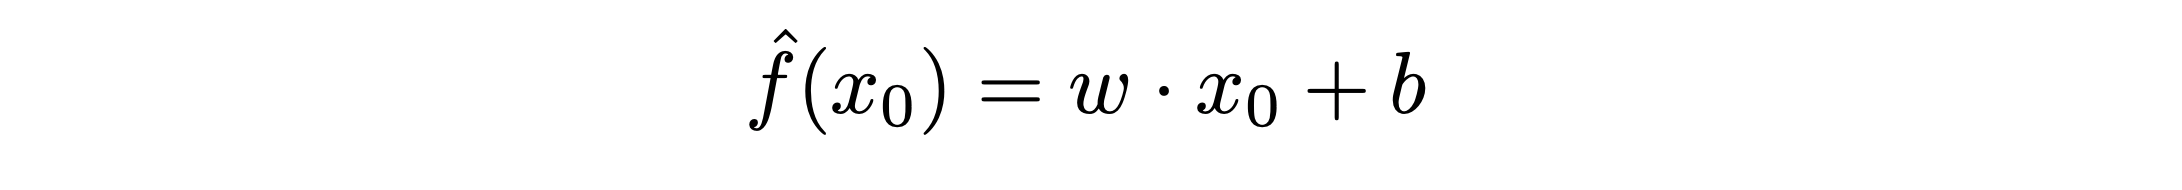

<font size=5><center>Where $x_0$ is our single feature, $w$ is the slope, and $b$ is the intercept. In ML the slope  is general called the "weight" and the intercept called the "bias".

***

<font size=5><center>__Remember how an ML model is made up of parameters__?

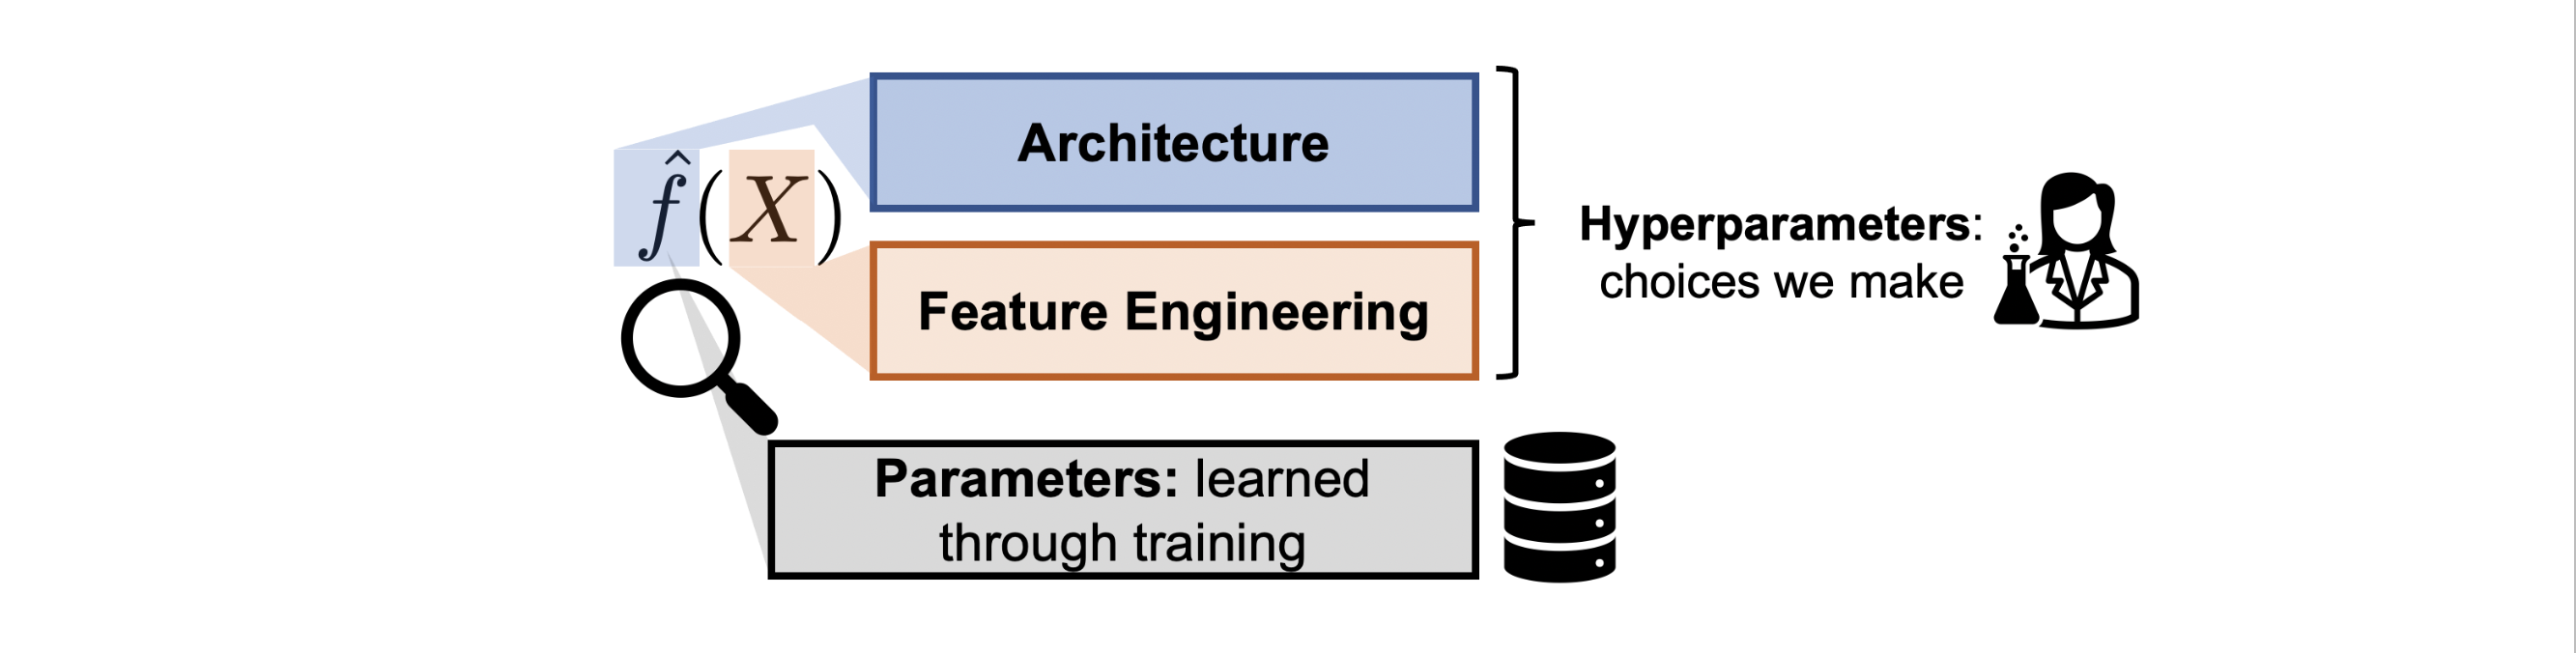

<font size=5><center>$w$ and $b$ are both parameters of the linear regressor - __we don't chose them, they are determined by fitting data.__

***

<font size=5><center>We want our parameters to be chosen such that the prediction error is minimized:

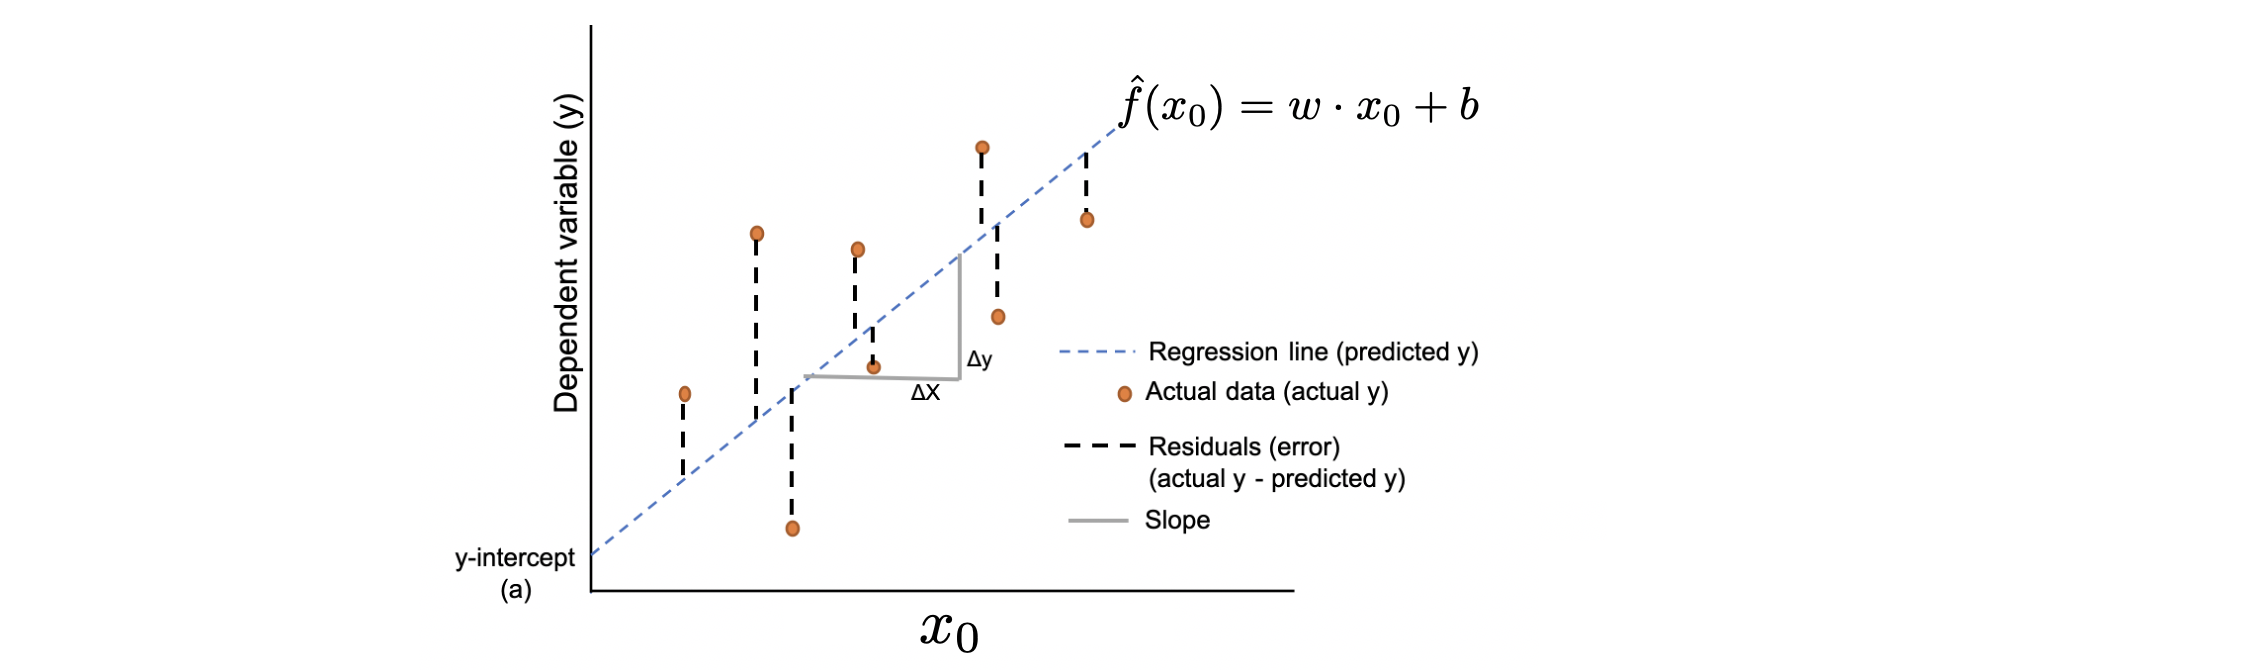

https://www.reneshbedre.com/blog/linear-regression.html

***

<font size=5><center>Linear regressors have __analytical best parameters given data__ that minimize the square error. This is not always true.

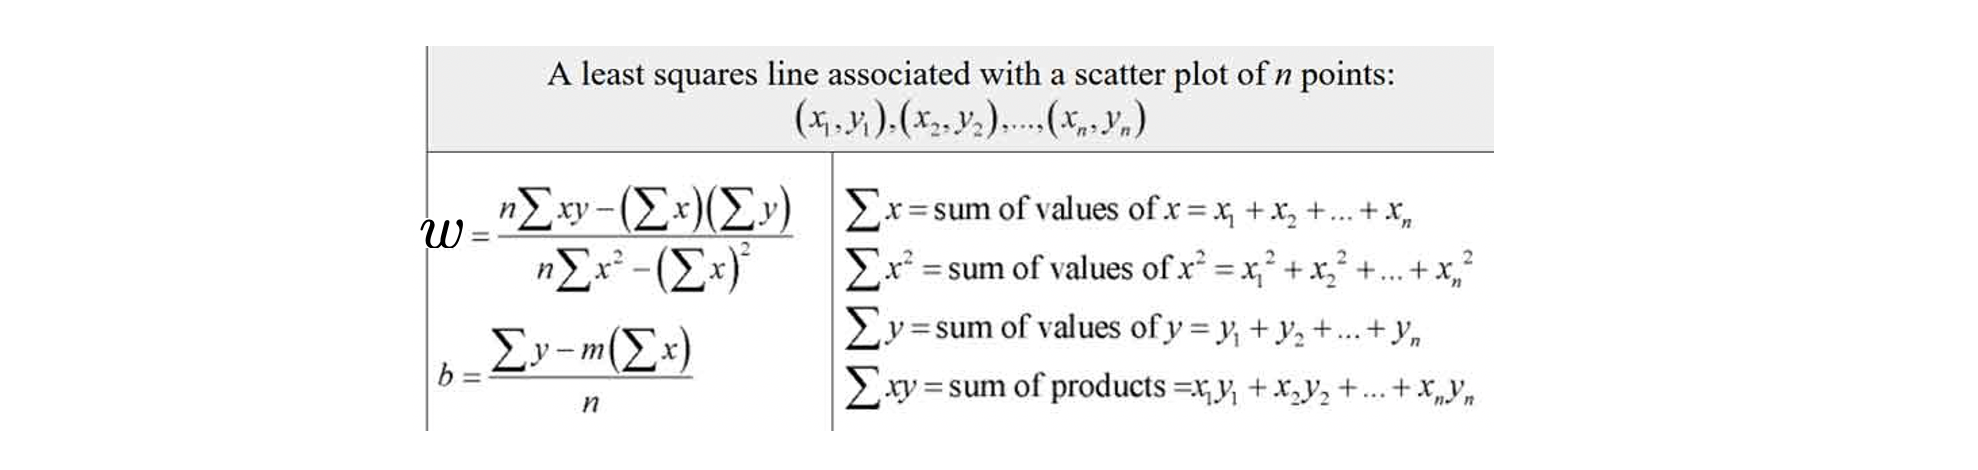

https://giasutamtaiduc.com/line-of-best-fit-formula.html

***

<font size=5><center>Let's use the HCEPDB data: JSC vs E Homo alpha

In [11]:
# load the data by downloading it
df = pd.read_csv('http://faculty.washington.edu/dacb/HCEPDB_moldata.zip').sample(500, random_state=200) # small dataset to make this easier to handle

<AxesSubplot: xlabel='jsc', ylabel='e_lumo_alpha'>

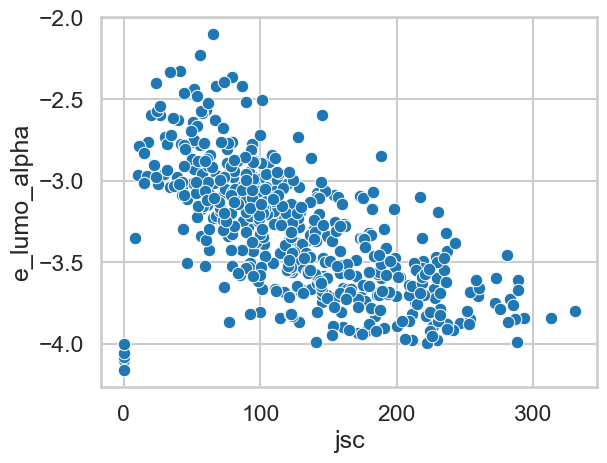

In [12]:
sns.scatterplot(df, x='jsc', y='e_lumo_alpha')

### C. _Exercise_: fit a linear model

<font size=4>Fit a linear model using `jsc` as $x$ and `e_lumo_alpha` as $y$ (_hint_: sklearn has a linear regressor just like it has a KNN!). Print out the values for $w$ and $b$ and plot the fit line over the data.

><span style='color:red'>remove for lecture</span>

In [13]:
model = sklearn.linear_model.LinearRegression()

In [15]:
model.fit(df['jsc'].values.reshape(-1,1), df['e_lumo_alpha'])

LinearRegression()

In [20]:
print(f"w={model.coef_}, b={model.intercept_}")

w=[-0.00342183], b=-2.8906463635510127


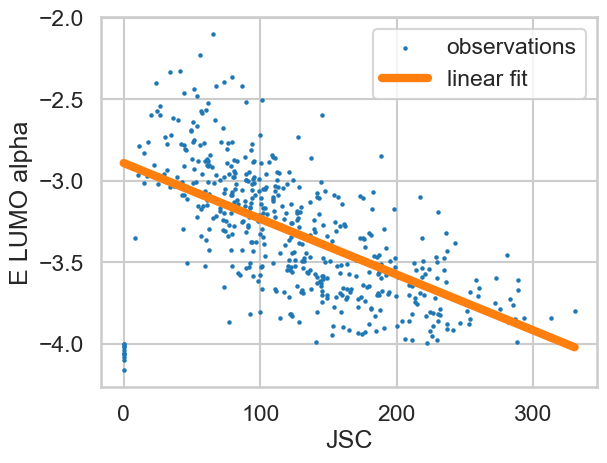

In [34]:
fig, ax = plt.subplots()
ax.scatter(df['jsc'], df['e_lumo_alpha'], label='observations', s=3)

x = np.linspace(df['jsc'].min(), df['jsc'].max()).reshape(-1,1)
ax.plot(x, model.predict(x), color='tab:orange', label='linear fit', lw=6)
ax.set_xlabel('JSC')
ax.set_ylabel('E LUMO alpha')
ax.legend()

### 3. _Poll_: are we there yet?

<font size=4>__Fact__: we have fit the best possible line to this data.
    
1. <font size=4> Have we found the best possible estimator, eg $\hat{f}(X) = f(X)$?
2. <font size=4> Have we minimized the reducable error for this dataset?

<font size=5><center>Consider the following plot:

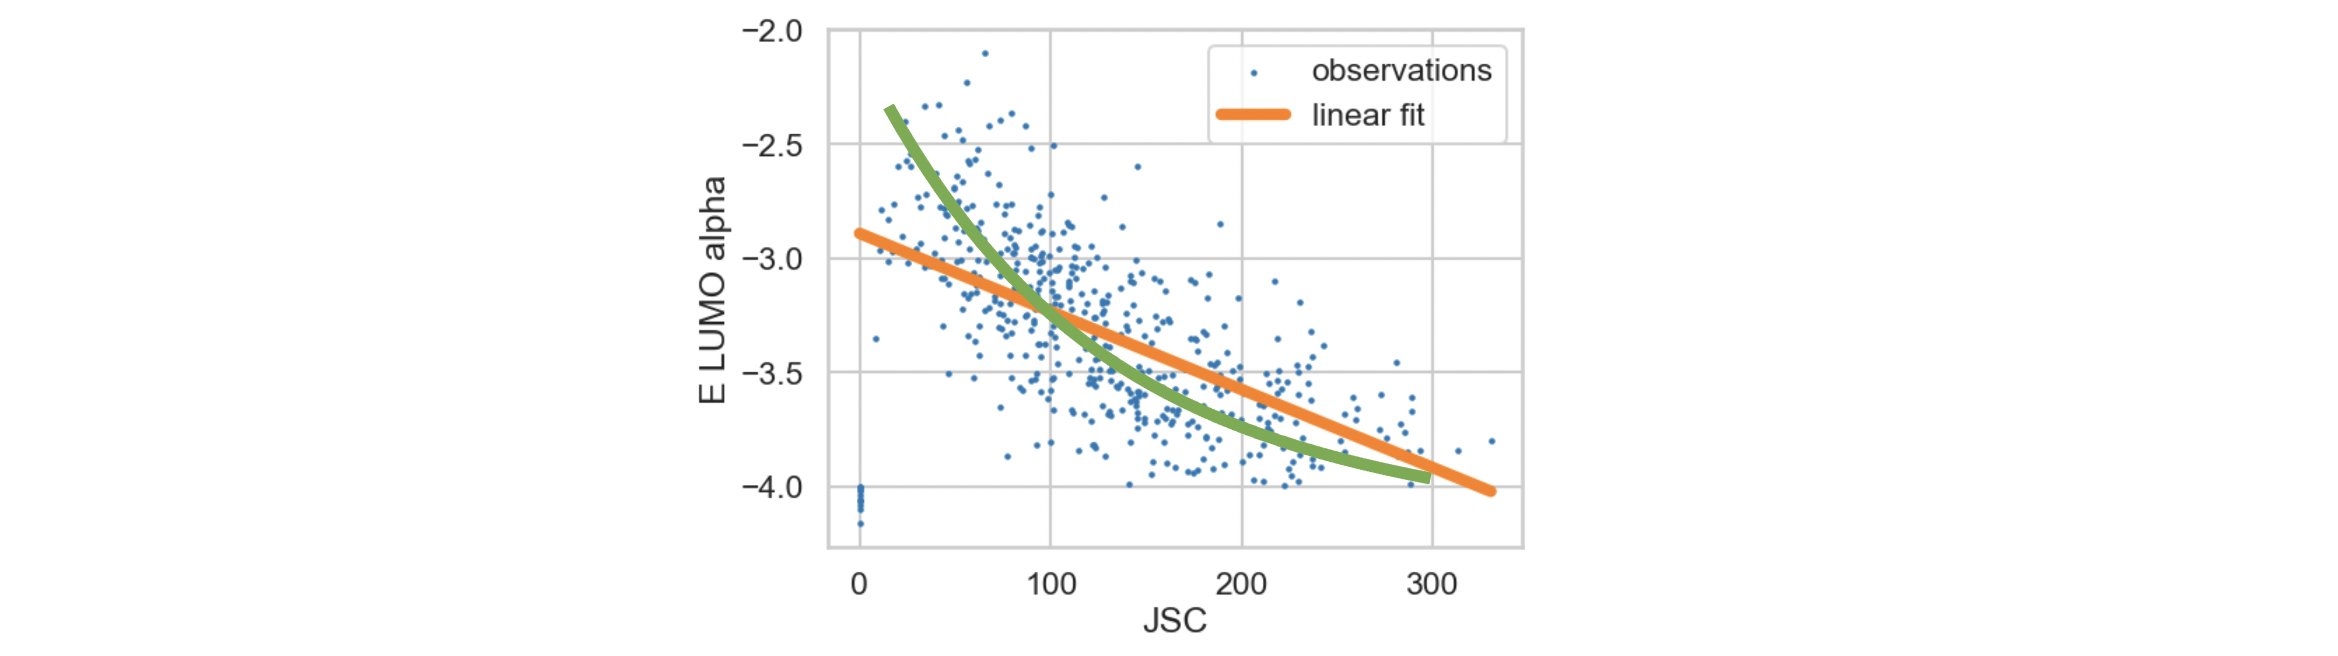


## 2. Classification from continuous output

<font size=5><center>Linear regressors have __analytical best parameters given data__ that minimize the square error. This is not always true.

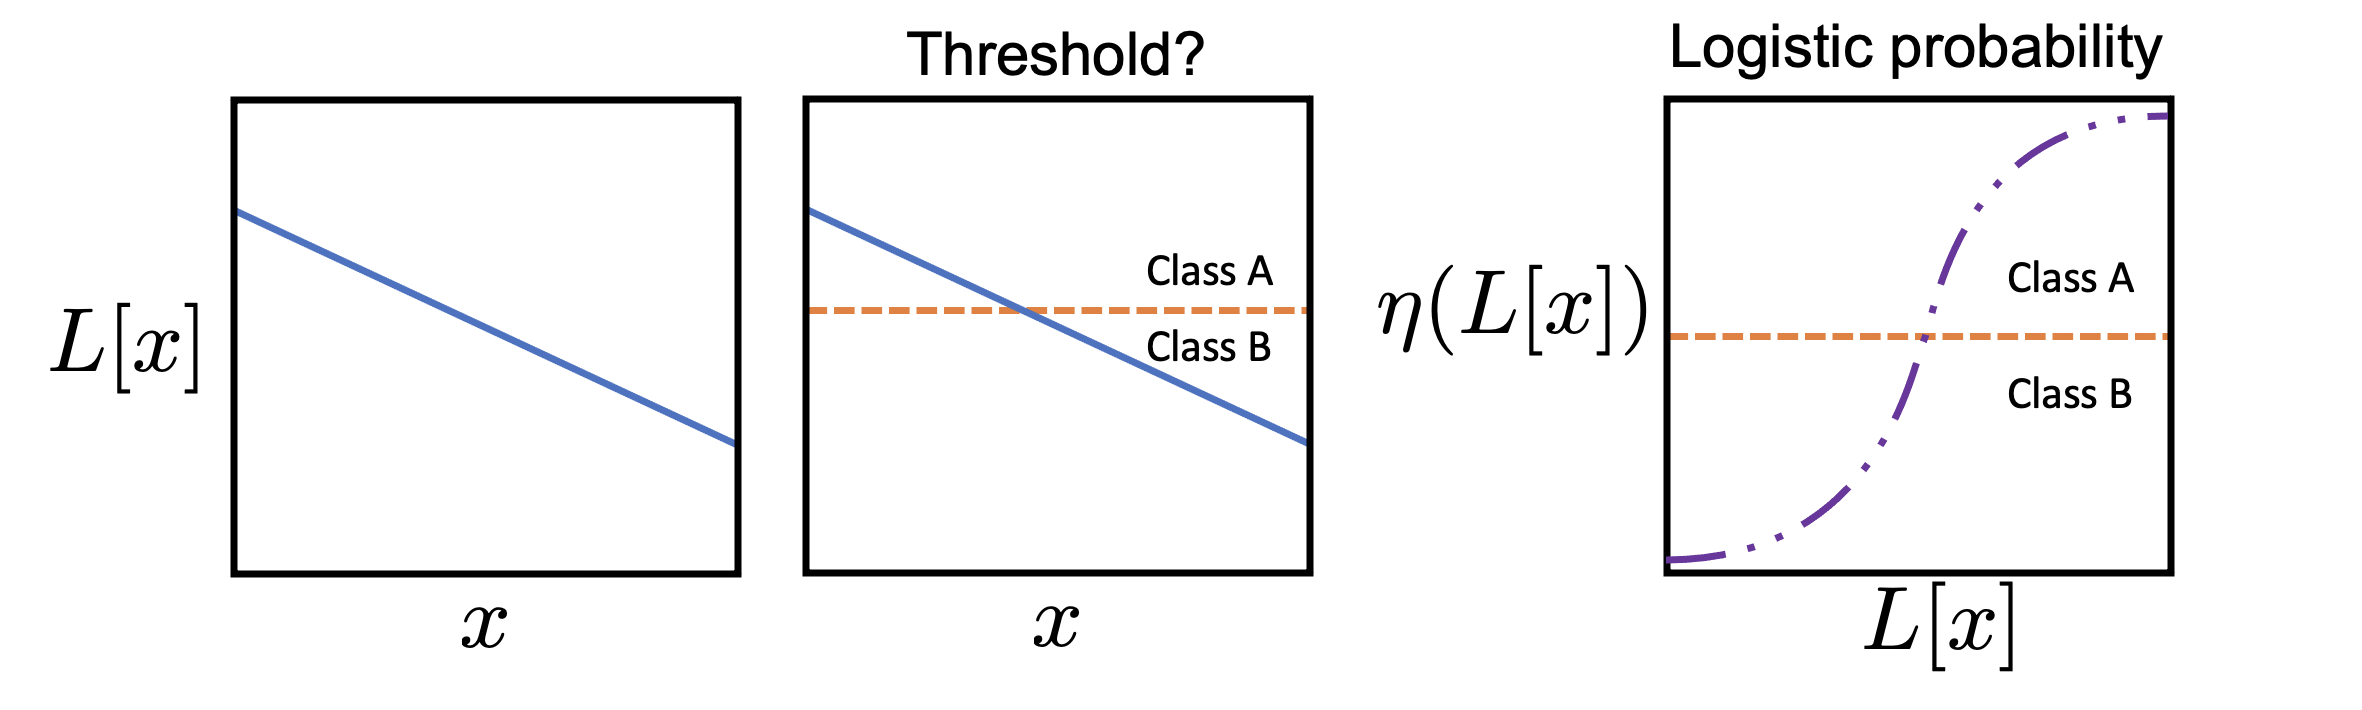

<font size=5><center>When we apply the lat technique to a linear model it is called __Logistic Regression__, and no longer has analytical best parameters.

<font size=4>See that type of model [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

## 3. Error/Accuracy Zoo

<font size=4>We have discussed accuracy and error of models broadly - but let's list some common ones used for regression and classification problems. Here $y$ are true labels in some dataset of size $N$ and $\hat{y}$ are the predicted labels of those same examples. $\bar{y}$ is the mean value of $y$ in the dataset.

<font size=5><center>__Regression__

#### Mean Squared Error (MSE)

<font size=4> $$MSE = \frac{1}{N}\Sigma_i^N(y_i-\hat{y}_i)^2$$

#### Mean Absolute Error (MAE)

<font size=4>More unstable than MSE but also more interpretable.

<font size=4> $$MSE = \frac{1}{N}\Sigma_i^N|y_i-\hat{y}_i|$$

#### R2 score

<font size=4>1.0 is a perfect predictor, 0.0 is guessing the mean.

<font size=4> $$R2 = 1-\frac{RSS}{TSS}$$

<font size=4>Where

<font size=4> $$RSS = \Sigma_i^N(y_i-\hat{y}_i)^2$$
    
<font size=4> $$TSS = \Sigma_i^N(\bar{y}-\hat{y}_i)^2$$

<font size=5><center>__Classification__

#### Accuracy

<font size=4> $$Acc = \frac{1}{N}\Sigma_i^N\mathbb{I}(y_i=\hat{y}_i)$$

#### Balanced Accuracy

<font size=4>Can be useful on imbalanced datasets, for example if a model was incapable of predicting `False` but was given a dataset of mostly `True` it would have a high accuracy. Here $M$ is the total number of classes and $N_j$ is the number of examples in the dataset with that class.

<font size=4> $$Acc = \frac{1}{M}\Sigma_j^M\bigg[\frac{1}{N_j}\Sigma_i^{N_j}\mathbb{I}(y_i=\hat{y}_i)\bigg]$$